Que.Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good".

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Import the data.
data=pd.read_csv("/content/Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [40]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [42]:
#Check of null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [44]:
#Check of duplicates values.
data[data.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [46]:
#Create numerical variable for categorical data
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [9]:
# Take high taxable income above 30000. 
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

In [10]:
# Assigning the values of independent and target varibales from the data to a new variable
x=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [11]:
data["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [12]:
# Train test split at a ratio of 70:30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
# Build a Random forest classfier model
model = RandomForestClassifier(n_estimators=110, max_features=3)

In [14]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

In [15]:
# Predicting the model on the train data.
Y_pred=model.predict(x_train)

In [16]:
#Find the train accuracy.
model.score(x_train, y_train)

1.0

In [17]:
#Predicting the model on the test data
y_pred=model.predict(x_test)

In [18]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7277777777777777


In [19]:
#Find the test accuracy
model.score(x_test, y_test)

0.7277777777777777

In [20]:
#Identify the important features that contribute to the output.
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

City.Population    0.528075
Work.Experience    0.280602
Marital.Status     0.094677
Urban              0.048879
Undergrad          0.047768
dtype: float64

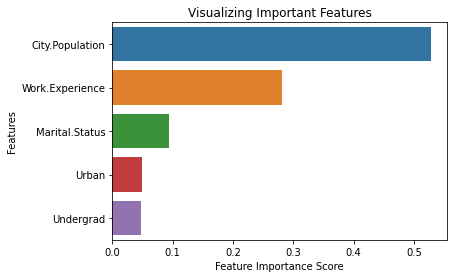

In [21]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [22]:
# Running a loop from the range of 1 to 5 for different max_features in the Random forest classifier
train_accuracy = []
test_accuracy = []
for max_features in range(1,5):
    model=RandomForestClassifier(n_estimators=110, max_features=3)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [23]:
#Jotting down the test accuracies for different max_features of the Random Forest classifier
data = pd.DataFrame({'max_features':range(1,5),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.738889
1,2,1.0,0.733333
2,3,1.0,0.738889
3,4,1.0,0.727778


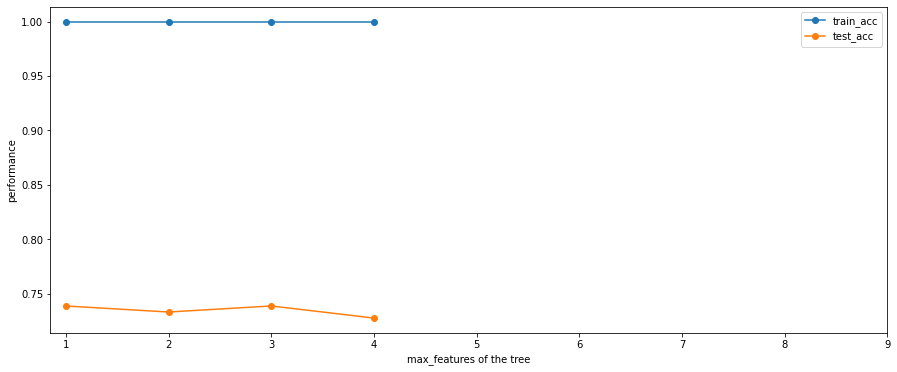

In [24]:
# Visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = 'o')
plt.plot(data['max_features'], data['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

In [25]:
# Confusion matrix
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  1,  38],
       [ 11, 130]])

Text(0.5, 1.0, 'Accuracy Score: 0.7277777777777777')

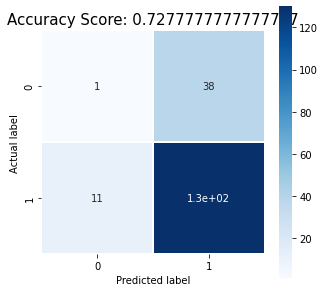

In [26]:
# Visualising the confusion Matrix with heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [27]:
# Predicting the values of test data
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.08      0.03      0.04        39
           1       0.77      0.92      0.84       141

    accuracy                           0.73       180
   macro avg       0.43      0.47      0.44       180
weighted avg       0.62      0.73      0.67       180



In [28]:
#Trying a cross validation KFold split.
kfold=KFold(n_splits=8,random_state=7,shuffle=True)

In [52]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7933333333333332


In [53]:
#Constructing an Adaboost classifier to classify the highes risk of fraud taxable income.
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7933333333333332


In [54]:
#Evaluating the Adaboost classfier with the train test split for check accuaracy
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=7)

In [55]:
Y_pred=model.predict(x_train)

In [58]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 0.7976190476190477


In [61]:
model.score(x_train, y_train)

0.7976190476190477

In [63]:
# Predict the model on the test data
y_pred=model.predict(x_test)

In [64]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7833333333333333


It is evident that the highest accuracy from the Random forest classifier is, when it takes 1 maximum feature, of 76.1% . Thus, it can be used as the final model to predict and meet the objective of the problem.